In [1]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
drivers = pd.read_csv(
    "../files/input/drivers.csv",
    sep=",",
    thousands=None,
    decimal=".",
)
drivers.head()

,driverId,name,ssn,location,certified,wage-plan
0,10,George Vetticaden,621011971,244-4532 Nulla Rd.,N,miles
1,11,Jamie Engesser,262112338,366-4125 Ac Street,N,miles
2,12,Paul Coddin,198041975,Ap #622-957 Risus. Street,Y,hours
3,13,Joe Niemiec,139907145,2071 Hendrerit. Ave,Y,hours
4,14,Adis Cesir,820812209,Ap #810-1228 In St.,Y,hours


In [3]:
timesheet = pd.read_csv(
    "../files/input/timesheet.csv",
    sep=",",
    thousands=None,
    decimal=".",
)
timesheet.head()

,driverId,week,hours-logged,miles-logged
0,10,1,70,3300
1,10,2,70,3300
2,10,3,60,2800
3,10,4,70,3100
4,10,5,70,3200


In [4]:
mean_timesheet = timesheet.groupby("driverId").mean()
mean_timesheet.head()


,week,hours-logged,miles-logged
driverId,,,
10,26.5,62.153846,2829.807692
11,26.5,70.038462,3448.076923
12,26.5,50.750000,2614.653846
13,26.5,52.442308,2579.346154
14,26.5,53.480769,2627.384615


In [5]:
mean_timesheet.pop("week")
mean_timesheet.head()

,hours-logged,miles-logged
driverId,,
10,62.153846,2829.807692
11,70.038462,3448.076923
12,50.750000,2614.653846
13,52.442308,2579.346154
14,53.480769,2627.384615


In [6]:
mean_hours_logged_by_driver = timesheet.groupby("driverId")["hours-logged"].transform(
    "mean"
)
mean_hours_logged_by_driver.head(15)

0     62.153846
1     62.153846
2     62.153846
3     62.153846
4     62.153846
5     62.153846
6     62.153846
7     62.153846
8     62.153846
9     62.153846
10    62.153846
11    62.153846
12    62.153846
13    62.153846
14    62.153846
Name: hours-logged, dtype: float64

In [7]:
timesheet_with_means = timesheet.copy()
timesheet_with_means["mean_hours-logged"] = mean_hours_logged_by_driver
timesheet_with_means.head()

,driverId,week,hours-logged,miles-logged,mean_hours-logged
0,10,1,70,3300,62.153846
1,10,2,70,3300,62.153846
2,10,3,60,2800,62.153846
3,10,4,70,3100,62.153846
4,10,5,70,3200,62.153846


In [10]:
timesheet_below = timesheet_with_means[
    timesheet_with_means["hours-logged"] < timesheet_with_means["mean_hours-logged"]
]
display(timesheet_below.head(), timesheet_below.tail())

,driverId,week,hours-logged,miles-logged,mean_hours-logged
2,10,3,60,2800,62.153846
9,10,10,50,2500,62.153846
19,10,20,30,1200,62.153846
20,10,21,50,2500,62.153846
25,10,26,60,2600,62.153846


,driverId,week,hours-logged,miles-logged,mean_hours-logged
1756,43,41,51,2701,52.884615
1760,43,45,46,2671,52.884615
1762,43,47,50,2572,52.884615
1763,43,48,52,2517,52.884615
1767,43,52,48,2764,52.884615


In [11]:
sum_timesheet = timesheet.groupby("driverId").sum()
sum_timesheet.head(10)

,week,hours-logged,miles-logged
driverId,,,
10,1378,3232,147150
11,1378,3642,179300
12,1378,2639,135962
13,1378,2727,134126
14,1378,2781,136624
15,1378,2734,138750
16,1378,2746,137205
17,1378,2701,135992
18,1378,2654,137834


In [25]:
sum_timesheet = sum_timesheet[["hours-logged", "miles-logged"]]
sum_timesheet.head(10)

,hours-logged,miles-logged
driverId,,
10,3232,147150
11,3642,179300
12,2639,135962
13,2727,134126
14,2781,136624
15,2734,138750
16,2746,137205
17,2701,135992
18,2654,137834


In [18]:
timesheet.groupby("driverId")["hours-logged"].agg(["min", "max"])

,min,max
driverId,,
10,0,76
11,0,92
12,0,60
13,10,60
14,45,60
15,45,60
16,45,60
17,20,60
18,45,60


In [20]:
summary = pd.merge(
    sum_timesheet,
    drivers[["driverId", "name"]],
    on="driverId",
)
summary

,driverId,week,hours-logged,miles-logged,name
0,10,1378,3232,147150,George Vetticaden
1,11,1378,3642,179300,Jamie Engesser
2,12,1378,2639,135962,Paul Coddin
3,13,1378,2727,134126,Joe Niemiec
4,14,1378,2781,136624,Adis Cesir
5,15,1378,2734,138750,Rohit Bakshi
6,16,1378,2746,137205,Tom McCuch
7,17,1378,2701,135992,Eric Mizell
8,18,1378,2654,137834,Grant Liu
9,19,1378,2738,137968,Ajay Singh


In [21]:
import os

if not os.path.exists("../files/output"):
    os.makedirs("../files/output")

summary.to_csv(
    "../files/output/summary.csv",
    sep=",",
    header=True,
    index=False,
)

In [22]:
top10 = summary.sort_values(by="miles-logged", ascending=False).head(10)
top10

,driverId,week,hours-logged,miles-logged,name
1,11,1378,3642,179300,Jamie Engesser
0,10,1378,3232,147150,George Vetticaden
23,33,1378,2759,139285,Sridhara Sabbella
15,25,1378,2723,139180,Jean-Philippe Playe
29,39,1378,2745,138788,David Kaiser
5,15,1378,2734,138750,Rohit Bakshi
25,35,1378,2728,138727,Emil Siemes
11,21,1378,2751,138719,Jeff Markham
31,41,1378,2723,138407,Greg Phillips
19,29,1378,2760,138255,Teddy Choi


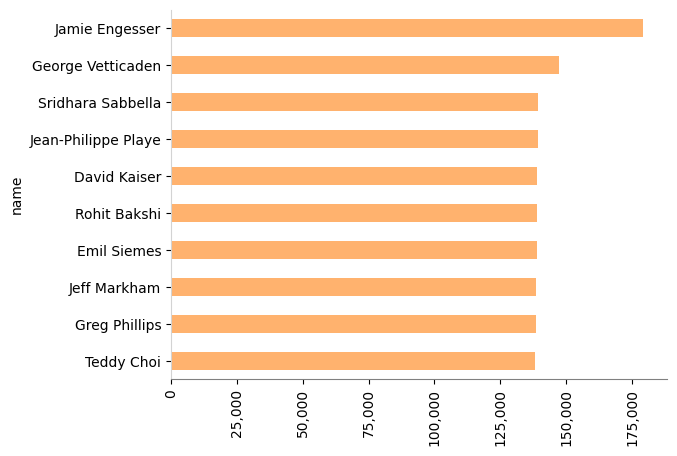

In [23]:
# Creación de un gráfico de barras horizontales
# La columna 'name' pasa a ser el nombre de las filas
top10 = top10.set_index("name")

# Paleta de colores:
#   tab:blue     tab:red       tab:pink
#   tab:orange   tab:purple    tab:gray
#   tab:green    tab:brown     tab:olive
#   tab:cyan
top10["miles-logged"].plot.barh(color="tab:orange", alpha=0.6)

plt.gca().invert_yaxis()

plt.gca().get_xaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ","))
)

plt.xticks(rotation=90)

plt.gca().spines["left"].set_color("lightgray")
plt.gca().spines["bottom"].set_color("gray")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)

if not os.path.exists("../files/plots"):
    os.makedirs("../files/plots")

plt.savefig("../files/plots/top10_drivers.png", bbox_inches="tight")